# K-mean Clustering

In [1]:
# K-means implementaiton
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

def data_gen(n_samples = 1500, n_ctrs = 3, rand_s = 8):
    blobs = datasets.make_blobs(n_samples=n_samples,random_state=rand_s, centers =n_ctrs)
    return blobs

In [2]:

def display2D_clusters(X, y, centroids=None, title = 'Dataset'):
    '''Display 2D data samples and centroids
    Parameters
    ----------
    X: data samples
    y: clustering index
    centroids: an numpy array of centroids
    title: figure title
    '''
    plt.scatter(X[:,0], X[:,1], c=y, s=10)
    plt.scatter(centroids[:, 0], centroids[:,1], marker='*', c='r', s=150)
    plt.title(title)
    plt.show()

In [3]:
# Choosing good centroids for initialization

def mean_min_dis(centroids):
    '''calculate the mean of min distances among centroids   
    '''
    n = centroids.shape[0]
    min_dis = np.zeros(n)
    
    for i, p in enumerate(centroids):
        ds = np.linalg.norm(centroids - p, axis = 1)
        min_dis[i] = np.min(ds[ds>0])

    d = np.mean(min_dis)  
    return d

def good_init(X, K = 3, n_init=100):
    '''Generate K 'good' centroids
    
    Parameters:
    -----------
    X: data samples
    K: the number of clusters
    n_init: the number of initializations
    
    Return:
    -------
    c_best: an numpy array of K centroids
    idx_best: indices of the centroids
    
    '''
    
    n = X.shape[0]
    c_best = np.copy(X[0:K, :])#initial centroids
    idx_best=np.zeros(K)
    
    d_best= mean_min_dis(c_best)
    # choose best centroids from n_init random sets
    for i in range(n_init): 
        # generate a random set of centroids: c
        idx = np.random.randint(0, n-1, size=K)
        C_x = X[idx, 0]
        C_y = X[idx, 1]
        c = np.array(list(zip(C_x, C_y)), dtype=np.float32)
        
        d = mean_min_dis(c)

        if  np.isclose(d, d_best) is False:
            c_best=c
            d_best=d
            idex_best=idx
            
    return c_best, idx_best

In [4]:
# The K-means algorithm
def my_kmeans(X, k_list = [1, 2, 3, 4, 5, 6, 7, 8], max_iter = 100):
    '''K-means function
    
    Parameters
    -----------
    X: input data samples
    k_list: list of all possible number of clusters
    max_iter: max iterations
    
    
    Returns 
    -------
    best_k: the best k from k_list
    best_cluster_idx: the cluster indices
    best_ctrs: centroids
    best_inertia: inertia (within-cluster sum of squared distance)
    
    '''
    best_k = k_list[0]
    best_inertia = np.inf
    best_cluster_idx = np.zeros(len(X))
    #inertia=0
    for k in k_list:
        #step 1: initilization using the good_init function.
        ctrs, idx= good_init(X, K = k)

        itr = 0
        cluster_idx = np.zeros(len(X))
        dists = np.zeros((len(X), k))
        while itr <=max_iter: # max_iter is the stopping condition

            def dist(a, b, ax=1):
                return np.linalg.norm(a - b, axis=ax)
            
            for i in range(len(X)):
                distances= dist(X[i], ctrs)
                cluster = np.argmin(distances)
                cluster_idx[i] = cluster    
            
            for i in range(k):
                points = [X[j] for j in range(len(X)) if cluster_idx[j] == i]
                ctrs[i] = np.mean(points, axis=0)

            itr = itr+1
        
        inertia=0
        for i in range(k):
            inert = (dist(X[i], ctrs))**2
        inertia = sum(inert)
        
        if inertia < best_inertia:
            best_inertia = np.mean(inertia)
            best_k = k
            best_ctrs = np.copy(ctrs)
            best_cluster_idx = np.copy(cluster_idx)
    
    return best_k, best_cluster_idx, best_ctrs, best_inertia

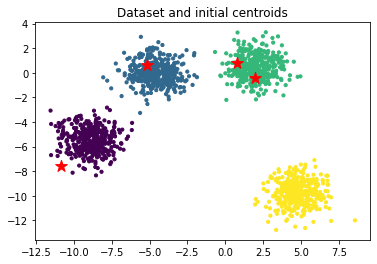

The number of successful initilizations: 0/10


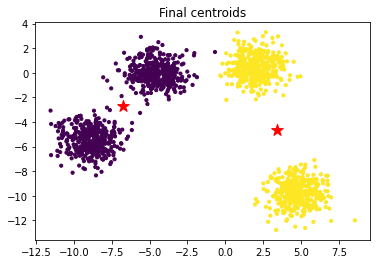

The best number of cluster is 2.
The centroids are [[-6.75453756 -2.73136988]
 [ 3.3915397  -4.65255872]].
The inertia is 106.38087899749266.


In [5]:
if __name__ == '__main__':
    
    # generate a dataset with k clusters
    k=4
    blobs = data_gen(n_samples = 1500, n_ctrs = k, rand_s = 170)

    #display_clusters(X, y, title = 'Dataset')
    X, y = blobs    
    cents, idx = good_init(X, K = k)
    display2D_clusters(X, y, centroids=cents, title = 'Dataset and initial centroids')

    # evaluate the initialization function
    cnt = 0
    for i in range(10):
        cents, idx = good_init(X, K = k)
    print('The number of successful initilizations: {}/10'.format(cnt)) 
    
    best_k, cluster_idx, ctrs, inertia = my_kmeans(X, k_list = [2, 3, 4], max_iter = 500)
    display2D_clusters(X, cluster_idx, centroids=ctrs, title = 'Final centroids')
    
    print('The best number of cluster is {}.'.format(best_k))
    print('The centroids are {}.'.format(ctrs))
    print('The inertia is {}.'.format(inertia))    